In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.sparse import csr_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer

# Evaluation
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# without text

In [4]:
train = pd.read_csv('train_process_2.csv')
test = pd.read_csv('test_process_2.csv')

In [5]:
train.head()

,isAdult,runtime,budget,revenue,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,...,760,761,762,763,764,765,766,767,sentiment_score,averageRating
0,0,-0.553539,-0.26443,-0.190517,1,0,0,0,0,0,...,0.180402,-0.309614,-0.109253,-0.083931,-0.124375,-0.049131,0.448019,0.212206,0.385075,5.6
1,0,-0.020035,0.52012,0.682158,1,0,0,0,0,0,...,0.037835,-0.344181,-0.057734,0.087253,-0.018626,-0.022519,0.800948,0.356451,0.237056,6.1
2,0,-0.104272,-0.26443,-0.190673,1,0,0,0,0,0,...,-0.030777,-0.322845,-0.061202,0.305364,-0.348252,-0.281722,0.328683,0.157720,-0.939000,5.3
3,0,-0.216589,-0.26443,-0.190673,1,0,0,0,0,0,...,-0.032892,-0.349964,-0.195581,0.195616,-0.037520,-0.173880,0.454948,0.368299,0.596515,4.4
4,0,0.288836,-0.26443,-0.190673,1,0,0,0,0,0,...,-0.070856,-0.477748,-0.230749,0.008394,-0.032509,-0.091296,0.341122,0.329087,0.749380,5.9


In [7]:
train.columns

Index(['isAdult', 'runtime', 'budget', 'revenue', 'type_movie', 'type_short',
       'type_tvEpisode', 'type_tvMiniSeries', 'type_tvMovie', 'type_tvSeries',
       ...
       '760', '761', '762', '763', '764', '765', '766', '767',
       'sentiment_score', 'averageRating'],
      dtype='object', length=866)

In [8]:
test.head()

,isAdult,runtime,budget,revenue,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,...,760,761,762,763,764,765,766,767,sentiment_score,averageRating
0,0,-0.637776,-0.264430,-0.190673,0,0,0,0,0,0,...,-0.162714,-0.354363,-0.109860,-0.066936,-0.024200,0.056548,0.407594,0.190794,0.827733,6.4
1,0,0.036124,-0.264430,-0.190673,1,0,0,0,0,0,...,-0.063693,-0.427604,-0.111285,0.125412,-0.193320,-0.297931,0.454501,0.174848,0.913300,5.9
2,0,-0.693935,-0.264430,0.028983,0,0,0,0,0,0,...,0.057364,-0.401919,0.058704,0.094798,-0.140166,0.049896,0.385444,0.252005,0.978050,6.0
3,0,0.260757,-0.264430,-0.190673,1,0,0,0,0,0,...,0.089934,-0.371245,-0.233624,-0.101248,-0.116527,0.080164,0.579954,0.101615,-0.331283,8.0
4,0,1.945506,0.232452,-0.190499,1,0,0,0,0,0,...,-0.014188,-0.209907,-0.162889,-0.027457,-0.051272,-0.174269,0.308468,0.337298,0.637435,7.7


In [6]:
train['highRating'] = np.where(train['averageRating'] >= 6.5,1,0)
test['highRating'] = np.where(test['averageRating'] >= 6.5,1,0)

Text(0.5, 1.0, 'highRating for training dataset')

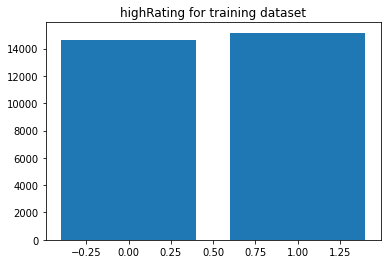

In [15]:
label = train['highRating'].value_counts().index
value = train['highRating'].value_counts().values
plt.bar(label,value)
#plt.xticks(rotation = 90)
plt.title('highRating for training dataset')

Text(0.5, 1.0, 'highRating for testing dataset')

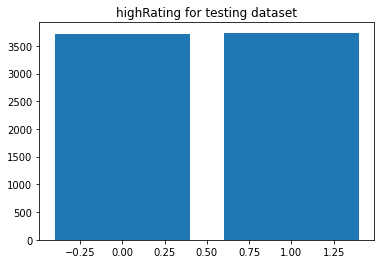

In [16]:
label = test['highRating'].value_counts().index
value = test['highRating'].value_counts().values
plt.bar(label,value)
#plt.xticks(rotation = 90)
plt.title('highRating for testing dataset')

In [7]:
X_train = train.iloc[:,0:96]
y_train = train['highRating']
X_test = test.iloc[:,0:96]
y_test = test['highRating']

In [37]:
X_train

,isAdult,runtime,budget,revenue,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,...,actor_Paul Newman,actor_Bruce Willis,actor_Barbara Stanwyck,actor_others,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored
0,0,-0.553539,-0.264430,-0.190517,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,-0.020035,0.520120,0.682158,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,-0.104272,-0.264430,-0.190673,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,-0.216589,-0.264430,-0.190673,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0.288836,-0.264430,-0.190673,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29755,0,0.064203,-0.264430,-0.190673,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
29756,0,-0.048114,-0.264430,-0.190673,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
29757,0,-0.104272,0.677031,0.366954,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
29758,0,-0.300826,-0.264430,-0.190673,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Baseline

In [92]:
def Clf_train(classifier, X_train_norm, y_train, X_test_norm):    
    # classifier
    clf = classifier
    # fit data
    clf.fit(X_train_norm, y_train)
    # get predictions
    y_pred = clf.predict(X_test_norm) # get predicted class
    y_train_pred = clf.predict(X_train_norm)
    y_proba = clf.predict_proba(X_test_norm) # get predicted prob.
        
    # generate confusion matrix
    cm = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), \
                      index=['Actual: 0', 'Actual: 1'], \
                      columns=['Pred: 0', 'Pred: 1'])
    
    # accuracy
    score = accuracy_score(y_test, y_pred)
    training_acc = accuracy_score(y_train, y_train_pred)
    
    # f1-score
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    
    return cm, score, f1, training_acc

In [93]:
def model_fit(X_train_df, y_train_df, X_test_df):
    models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state = seed),    
    "Random Forest": RandomForestClassifier(random_state = seed),
    "XGBoost": XGBClassifier(random_state = seed),
    "LightGBM": LGBMClassifier(random_state = seed)
    }
    training_accuracy = []
    accuracy_score = []
    f1_score = []

    for model_name in models:
        model = models[model_name]
        cm, score, f1, training_acc = Clf_train(model,X_train_df,y_train_df,X_test_df)
        training_accuracy.append([model_name,training_acc])
        accuracy_score.append([model_name,score])
        f1_score.append([model_name,f1])
        print("{}{}{}".format(model_name, " train accuracy: ", training_acc))
        print("{}{}{}".format(model_name, " accuracy: ", score))
        print("{}{}{}".format(model_name, " f1 score: ", f1))
        print("Confusion matrix:")
        print(cm)
        print("=="*20+"**"*10+"=="*20)
    
    return training_accuracy, accuracy_score, f1_score

In [8]:
seed = 2022

In [95]:
%%time
training_acc, accuracy_base, f1_base = model_fit(X_train, y_train, X_test)

Logistic Regression train accuracy: 0.7280241935483871
Logistic Regression accuracy: 0.7236559139784946
Logistic Regression f1 score: 0.7236542964503131
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0     2683     1021
Actual: 1     1035     2701
========================================********************========================================
Random Forest train accuracy: 0.9931451612903226
Random Forest accuracy: 0.7326612903225806
Random Forest f1 score: 0.7326598945454229
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0     2717      987
Actual: 1     1002     2734
========================================********************========================================
[18:28:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost train accuracy: 0.7944892473118279
XGBoost acc

In [96]:
training_accuracy = pd.DataFrame(training_acc, columns = ['model','Training Accuracy'])
training_accuracy

,model,Training Accuracy
0,Logistic Regression,0.728024
1,Random Forest,0.993145
2,XGBoost,0.794489
3,LightGBM,0.771640


In [97]:
accuracy_base = pd.DataFrame(accuracy_base, columns = ['model','Accuracy'])
accuracy_base

,model,Accuracy
0,Logistic Regression,0.723656
1,Random Forest,0.732661
2,XGBoost,0.747715
3,LightGBM,0.740860


In [98]:
f1_base = pd.DataFrame(f1_base, columns = ['model','F1_score'])
f1_base

,model,F1_score
0,Logistic Regression,0.723654
1,Random Forest,0.732660
2,XGBoost,0.747714
3,LightGBM,0.740840


## Baseline finetuning

### Logistic regression

In [57]:
lr_classifier = LogisticRegression(max_iter=500,random_state = seed)
#solver = 'saga', max_iter=1000
params_LR = {
            'solver':['sag', 'saga','liblinear'],
            'penalty': ['l2','l1'],
            'C': [10, 1.0, 0.1, 0.01]
            #'C': [5, 10, 15]
}

gs_LR = GridSearchCV(estimator=lr_classifier, 
                 param_grid=params_LR, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_LR.fit(X_train, y_train)
gs_LR.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [60]:
%%time
# 2nd round 
lr_classifier = LogisticRegression(max_iter=1000,random_state = seed,solver='saga')
params_LR = {
            # 'solver':['sag', 'saga','liblinear'],
            'penalty': ['l0','l1'],
            'C': [5, 10, 15]
}

gs_LR = GridSearchCV(estimator=lr_classifier, 
                 param_grid=params_LR, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_LR.fit(X_train, y_train)
gs_LR.best_params_

Wall time: 5min 45s


{'C': 5, 'penalty': 'l1'}

In [61]:
lr_1 = gs_LR.best_estimator_
cm_lr_1,score_lr_1,f1_lr_1 = Clf_train(lr_1, X_train, y_train, X_test)

print(f"Accuracy Score for LR: {score_lr_1}")
print(f"F1 score for LR: {f1_lr_1}")
print(cm_lr_1)

Accuracy Score for LR: 0.7244623655913979
F1 score for LR: 0.7244599563283844
           Pred: 0  Pred: 1
Actual: 0     2684     1020
Actual: 1     1030     2706


### LightGBM

In [62]:
%%time
# Start with low learning rate and basic parameter settings
lgbm_classifier = LGBMClassifier(random_state = seed)

params_lgbm = {
    'learning_rate' : [0.1,0.3],
    'max_depth':[10,None],
    'n_estimators':[100,200],
    'subsample': [0.3, 0.8], 
    'colsample_bytree': [0.5, 1],
    'reg_alpha':[0.5,1],
    'reg_lambda':[0.5,1],
    'min_child_weight':[1e-3,1e-2],
    'min_child_samples':[15,20]
}

gs_lgbm = GridSearchCV(estimator=lgbm_classifier, 
                 param_grid=params_lgbm, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_lgbm.fit(X_train, y_train)

gs_lgbm.best_params_

Wall time: 16min 13s


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'n_estimators': 200,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'subsample': 0.3}

In [64]:
lgb_1 = gs_lgbm.best_estimator_
cm_lgb_1,score_lgb_1,f1_lgb_1 = Clf_train(lgb_1, X_train, y_train, X_test)

print(f"Accuracy Score for LGB: {score_lgb_1}")
print(f"F1 score for LGB: {f1_lgb_1}")
print(cm_lgb_1)

Accuracy Score for LGB: 0.7481182795698925
F1 score for LGB: 0.7481152034533893
           Pred: 0  Pred: 1
Actual: 0     2770      934
Actual: 1      940     2796


In [20]:
lgbm_best = LGBMClassifier(
 random_state = seed, 
 colsample_bytree = 0.5,
 learning_rate= 0.1,
 max_depth= 10,
 min_child_samples= 20,
 min_child_weight= 0.001,
 n_estimators= 200,
 reg_alpha= 0.5,
 reg_lambda= 0.5,
 subsample= 0.3)
lgbm_best.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.5, max_depth=10, n_estimators=200,
               random_state=2022, reg_alpha=0.5, reg_lambda=0.5, subsample=0.3)

In [118]:
X_train_pred = gs_lgbm.predict(X_train)

In [121]:
training_acc = accuracy_score(y_train, X_train_pred)
training_acc

0.7818548387096774

### XGBoost

In [99]:
%%time
# Start with low learning rate and basic parameter settings
#tune max_depth & min_child_weight
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 eval_metric='auc', nthread=4, scale_pos_weight=1, seed=27, use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Wall time: 16min 26s


({'mean_fit_time': array([ 14.00625448,  17.14691629,  17.20276337,  60.46287823,
          38.10545197,  32.6971818 ,  55.00283046,  43.54108672,
          43.58326631,  61.40755863, 113.17336497, 223.70336814]),
  'std_fit_time': array([ 1.72765023,  0.67284488,  0.93023529,  8.60046585,  2.43135747,
          2.63394296,  3.21697313,  1.42951987,  0.70113806,  4.21525987,
         65.47551439, 18.26063114]),
  'mean_score_time': array([0.07434425, 0.06921506, 0.06163549, 0.09355054, 0.06972456,
         0.0722065 , 0.08676901, 0.08038611, 0.07862911, 0.07499909,
         0.1573791 , 0.16318116]),
  'std_score_time': array([0.00560903, 0.013074  , 0.00890654, 0.02025791, 0.01238468,
         0.01095279, 0.03081709, 0.01175995, 0.01112182, 0.00744742,
         0.04289472, 0.03558854]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [103]:
%%time
# Tune max_depth & min_child_weight further
param_test2 = {
 'max_depth':[7,8,9],
 'min_child_weight':[1,2,3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 eval_metric='auc', nthread=4, scale_pos_weight=1, seed=27, use_label_encoder=False), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Wall time: 5min 23s


({'mean_fit_time': array([22.13071213, 21.15352888, 22.66558223, 31.55533075, 30.52005014,
         27.48877931, 32.21995449, 30.9680985 , 26.61106195]),
  'std_fit_time': array([0.35547342, 0.04411478, 1.43546224, 1.46693674, 0.87708257,
         1.49757337, 1.20938683, 2.3747588 , 4.44005917]),
  'mean_score_time': array([0.04747291, 0.0522603 , 0.05325766, 0.05346193, 0.04745445,
         0.05035205, 0.06476426, 0.05923157, 0.0536046 ]),
  'std_score_time': array([0.00635809, 0.01341892, 0.00692631, 0.00354535, 0.00267621,
         0.00434567, 0.01199294, 0.00348127, 0.00485866]),
  'param_max_depth': masked_array(data=[7, 7, 7, 8, 8, 8, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 1, 2, 3, 1, 2, 3],
               mask=[False, False, False, False, False, False, False, False,
                     False],


In [104]:
# Tune Gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 eval_metric='auc', nthread=4, scale_pos_weight=1,seed=27,use_label_encoder=False), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([ 20.39898152,  29.38694491,  87.09176602, 330.3446064 ,
         381.81903005]),
  'std_fit_time': array([  4.43990283,   0.15896991,  55.75649772, 102.21267347,
          59.30422403]),
  'mean_score_time': array([0.04747343, 0.05605288, 1.18313975, 0.3127646 , 0.63590007]),
  'std_score_time': array([0.00376334, 0.00709021, 2.10386771, 0.09090689, 0.77808232]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.83185287, 0.83114371, 0.83120262, 0.83141767, 0.83110531]),
  'split1_test_score': array([0.83446457, 0.83410505, 0.83217512, 0.8328766 , 0.83299316]),
  'split2_test_score': array([0.83294331, 0.83250777, 0.83333938, 0.83283804, 0.83360543]),
  'split3_test_score': array([0.83271984, 0.83250043,

In [106]:
%%time
# Tune subsample & colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 eval_metric='auc', nthread=4, scale_pos_weight=1,seed=27,use_label_encoder=False), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

Wall time: 11min 20s


({'mean_fit_time': array([24.12045059, 28.91482844, 26.84577713, 25.14705052, 33.54324355,
         31.6502563 , 30.62833347, 29.17691402, 37.20759611, 34.82354741,
         32.66123948, 30.87280431, 41.76696167, 46.12061477, 43.53529701,
         36.57372885]),
  'std_fit_time': array([2.52091798, 0.82312906, 0.50379628, 0.30153581, 0.65454628,
         0.29177802, 0.34626395, 0.44602003, 0.33679146, 0.56596229,
         0.69159957, 0.46171257, 2.22413885, 0.70502743, 1.87426699,
         0.892005  ]),
  'mean_score_time': array([0.06610045, 0.05126433, 0.05527186, 0.05694809, 0.06194692,
         0.05837131, 0.05228066, 0.06261878, 0.06183925, 0.06116657,
         0.05162463, 0.05994177, 0.06573019, 0.08826985, 0.06727948,
         0.05085492]),
  'std_score_time': array([0.01906497, 0.00547268, 0.00599286, 0.00946682, 0.00933634,
         0.00570222, 0.00248968, 0.00990625, 0.00710638, 0.0072395 ,
         0.00298223, 0.00621693, 0.00614856, 0.05373947, 0.01498724,
         0.009732

In [108]:
%%time
#Further tunning on subsample and colsample_bytree
param_test5 = {
 'subsample':[i/100.0 for i in range(70,90,5)],
 'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.6,
 eval_metric='auc', nthread=4, scale_pos_weight=1,seed=27,use_label_encoder=False), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(X_train, y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

Wall time: 10min 16s


({'mean_fit_time': array([24.29256792, 27.2175786 , 25.40859466, 24.01601105, 27.47191629,
         28.43395357, 28.65310845, 29.7466929 , 33.77648001, 31.32611785,
         30.98762255, 31.00184126, 35.53903093, 34.49745331, 31.84117222,
         32.21855898]),
  'std_fit_time': array([1.59666151, 0.12496224, 1.5032328 , 0.13819174, 0.82414115,
         0.23016468, 0.60392702, 0.43126905, 0.66680794, 0.8664513 ,
         0.85505635, 0.28214391, 0.54517237, 0.33333361, 1.76969263,
         0.79318738]),
  'mean_score_time': array([0.05768056, 0.06072106, 0.06031256, 0.07759237, 0.07539811,
         0.07974148, 0.0702177 , 0.07160897, 0.06538954, 0.05958152,
         0.06469455, 0.07137341, 0.07085934, 0.08333993, 0.06528831,
         0.07217183]),
  'std_score_time': array([0.0041287 , 0.00757647, 0.01029022, 0.02086644, 0.02895086,
         0.02085744, 0.024663  , 0.01916729, 0.00863558, 0.00848293,
         0.01507611, 0.01174885, 0.01245655, 0.00976603, 0.00863946,
         0.015298

In [110]:
#Tune Regularization Parameters
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.6,
 eval_metric='auc', nthread=4, scale_pos_weight=1,seed=27,use_label_encoder=False), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(X_train, y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([35.11558304, 36.6938807 , 36.85824227, 39.84092631, 26.60384312]),
  'std_fit_time': array([0.26358244, 0.9103495 , 0.6239263 , 0.78584728, 5.64681631]),
  'mean_score_time': array([0.07799168, 0.08018637, 0.099933  , 0.08408461, 0.06603107]),
  'std_score_time': array([0.00635136, 0.00448723, 0.00603038, 0.0147122 , 0.00922532]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.83236844, 0.83161314, 0.83124119, 0.83102828, 0.81033841]),
  'split1_test_score': array([0.83241582, 0.83425923, 0.83396375, 0.83504316, 0.81312072]),
  'split2_test_score': array([0.83503761, 0.83353264, 0.8342553 , 0.83413371, 0.81074335]),
  'split3_test_score': array([0.83263738, 0.83275988, 0.8322

In [116]:
%%time
# Now we have optimal hyper-parameters, lower the learning rate and re-train the model
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 #reg_alpha = 1e-05,
 eval_metric='auc',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 use_label_encoder=False)

cm, score, f1, training_acc = Clf_train(xgb2, X_train, y_train, X_test)
cm, score, f1, training_acc

Wall time: 36min 15s


(           Pred: 0  Pred: 1
 Actual: 0     2754      950
 Actual: 1      927     2809,
 0.7477150537634408,
 0.7477012659760083,
 0.7949260752688172)

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=seed)
tuned_parameter = [{'bootstrap': [True],
                    'min_samples_leaf':[3,5,10],
                    'max_depth':[5, 10, 30, 50],
                   #'max_features': [5,6,7,8],
                   'min_samples_split':[8, 10, 12]}]

rfc_searcher = GridSearchCV(estimator=rfc,param_grid=tuned_parameter,cv=5)
rfc_searcher.fit(X_train, y_train)
print(rfc_searcher.best_params_)

## tune parameter
rf=RandomForestClassifier(max_depth=list(rfc_searcher.best_params_.values())[1],
                          min_samples_leaf=list(rfc_searcher.best_params_.values())[0],
                         # max_features = list(rfc_searcher.best_params_.values())[2],
                          min_samples_split = list(rfc_searcher.best_params_.values())[2],
                          random_state=43)
rf_model=rf.fit(X_train, y_train)
y_train_pred=rf_model.predict(X_train)
print("In-sample Accuracy of Random Forest: ",accuracy_score(y_train, y_train_pred))
y_test_pred=rf_model.predict(X_test)
print("Out-sample Accuracy of Random Forest: ",accuracy_score(y_test, y_test_pred))


{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 8}
In-sample Accuracy of Random Forest:  0.9404233870967742
Out-sample Accuracy of Random Forest:  0.7401881720430108


### Feature selection

In [126]:
from mrmr import mrmr_classif
X = pd.concat([X_train,y_train],axis=1)
corr = X.corr()
corr_rank = corr['highRating'].abs().sort_values(ascending = False).index
corr_rank = list(corr_rank)[1:]
print(corr_rank)

['genres_Horror', 'genres_Documentary', 'language_en', 'genres_Drama', 'genres_Thriller', 'genres_Biography', 'genres_Action', 'genres_Sci-Fi', 'country_US', 'runtime', 'language_others', 'genres_History', 'startYear_pre2000', 'startYear_post2010', 'genres_Comedy', 'country_others', 'language_ja', 'genres_Animation', 'type_video', 'type_short', 'country_JP', 'genres_Film-Noir', 'genres_War', 'genres_Music', 'language_ru', 'country_CA', 'type_tvMiniSeries', 'type_tvSpecial', 'revenue', 'genres_Mystery', 'country_FR', 'language_fr', 'company_others', 'genres_Fantasy', 'language_de', 'genres_News', 'genres_Adventure', 'release_month', 'director_others', 'genres_Short', 'country_GB', 'type_tvShort', 'type_movie', 'company_Metro-Goldwyn-Mayer (MGM)', 'company_Twentieth Century Fox Film Corporation', 'company_Warner Bros.', 'director_Woody Allen', 'company_Paramount Pictures', 'isAdult', 'language_es', 'genres_Musical', 'type_tvEpisode', 'language_hi', 'type_tvSeries', 'actor_Burt Lancaster'

In [127]:
mrmr_rank = mrmr_classif(X_train,y_train,K = len(X_train))
print(mrmr_rank)

100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:46<00:00,  2.03it/s]

['genres_Horror', 'genres_Documentary', 'language_en', 'genres_Action', 'type_tvMiniSeries', 'genres_Thriller', 'genres_Biography', 'genres_War', 'genres_Drama', 'genres_Sci-Fi', 'startYear_post2010', 'country_US', 'genres_History', 'type_short', 'language_others', 'type_video', 'language_ja', 'genres_Film-Noir', 'genres_Music', 'language_ru', 'runtime', 'country_CA', 'startYear_pre2000', 'release_month', 'genres_Comedy', 'genres_Animation', 'type_tvSpecial', 'genres_News', 'director_Woody Allen', 'genres_Fantasy', 'isAdult', 'country_JP', 'revenue', 'genres_Mystery', 'country_FR', 'country_others', 'type_tvShort', 'status_In Production', 'language_de', 'type_tvEpisode', 'language_fr', 'director_others', 'actor_Burt Lancaster', 'company_others', 'type_tvSeries', 'country_GB', 'genres_Adventure', 'actor_Barbara Stanwyck', 'genres_Short', 'status_Post Production', 'actor_Nicolas Cage', 'company_Metro-Goldwyn-Mayer (MGM)', 'company_Twentieth Century Fox Film Corporation', 'company_Warner 

In [131]:
mrmr_columns = ['genres_Horror', 'genres_Documentary', 'language_en', 'genres_Action', 'type_tvMiniSeries', 'genres_Thriller', 'genres_Biography', 'genres_War', 'genres_Drama', 'genres_Sci-Fi', 'startYear_post2010', 'country_US', 'genres_History', 'type_short', 'language_others', 'type_video', 'language_ja', 'genres_Film-Noir', 'genres_Music', 'language_ru', 'runtime', 'country_CA', 'startYear_pre2000', 'release_month', 'genres_Comedy', 'genres_Animation', 'type_tvSpecial', 'genres_News', 'director_Woody Allen', 'genres_Fantasy', 'isAdult', 'country_JP', 'revenue', 'genres_Mystery', 'country_FR', 'country_others', 'type_tvShort', 'status_In Production', 'language_de', 'type_tvEpisode', 'language_fr', 'director_others', 'actor_Burt Lancaster', 'company_others', 'type_tvSeries', 'country_GB', 'genres_Adventure', 'actor_Barbara Stanwyck', 'genres_Short', 'status_Post Production', 'actor_Nicolas Cage', 'company_Metro-Goldwyn-Mayer (MGM)', 'company_Twentieth Century Fox Film Corporation', 'company_Warner Bros.', 'language_es', 'genres_Adult', 'genres_Musical', 'genres_Reality-TV', 'actor_Paul Newman', 'status_Canceled', 'director_Jean-Luc Godard', 'company_Paramount Pictures', 'director_Werner Herzog', 'language_hi', 'director_John Ford', 'type_movie', 'actor_Gérard Depardieu', 'director_Charlie Chaplin', 'director_Raoul Walsh', 'genres_Talk-Show', 'actor_Bruce Willis', 'language_it', 'startYear_2000_2010', 'genres_Sport', 'director_Alfred Hitchcock', 'director_Michael Curtiz', 'status_Planned', 'genres_Romance', 'director_Georges Méliès', 'status_Released', 'actor_Michael Caine', 'actor_others', 'genres_Western', 'genres_Family', 'company_Universal Pictures', 'director_Sidney Lumet', 'genres_Crime', 'type_tvMovie', 'actor_John Wayne', 'status_Rumored', 'actor_Jackie Chan', 'country_IT', 'budget', 'actor_Robert De Niro']

In [133]:
len(mrmr_rank)

94

### feature importance

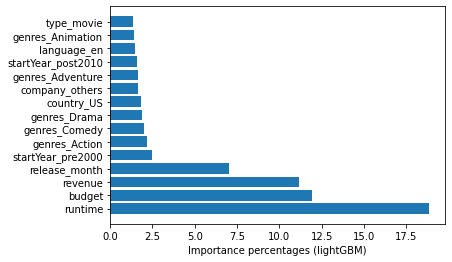

,Features,Importances
1,runtime,18.840822
2,budget,11.959245
3,revenue,11.190914
16,release_month,7.015200
13,startYear_pre2000,2.472023
17,genres_Action,2.154668
22,genres_Comedy,2.004343
25,genres_Drama,1.904126
61,country_US,1.820611
60,company_others,1.670286


In [25]:
# feature importance score
feature_importances = (lgbm_best.feature_importances_ / sum(lgbm_best.feature_importances_)) * 100
results = pd.DataFrame({'Features': X_train.columns,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True, ascending=False)
results = results.iloc[0:15]

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Importance percentages (lightGBM)')
plt.show()

results

### PFI

In [21]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgbm_best).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0596 ± 0.0026,genres_Documentary
0.0400 ± 0.0014,runtime
0.0206 ± 0.0031,revenue
0.0187 ± 0.0031,language_en
0.0170 ± 0.0044,genres_Drama
0.0137 ± 0.0056,startYear_pre2000
0.0136 ± 0.0057,budget
0.0135 ± 0.0034,genres_Horror
0.0095 ± 0.0032,country_US
0.0093 ± 0.0037,genres_Action
